In [11]:
import os
import warnings
import sys

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet

import mlflow
import mlflow.sklearn

import matplotlib.pyplot as plt

In [2]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2

In [3]:
mlflow.tracking.set_tracking_uri('http://mlflow-image:5500')
mlflow.set_experiment('mlflow-minio-test_9')

In [5]:
np.random.seed(40)

log_path ="ml_log_processed.csv"
data = pd.read_csv(log_path)

In [7]:
data.head()

,RSI,STOCHASTIC,fwd_returns
0,56.991619,78.882076,-0.005146
1,59.448606,77.279931,0.003864
2,60.945457,79.322084,0.013553
3,56.546196,72.484186,-0.000088
4,54.832174,60.957090,-0.002328


In [22]:
data.describe()

,RSI,STOCHASTIC,fwd_returns
count,2391.000000,2391.000000,2391.000000
mean,49.014909,29.503818,-0.000360
std,9.438435,31.808964,0.011189
min,18.373128,-36.852922,-0.049775
25%,43.507777,0.201805,-0.007220
50%,49.499864,26.832700,-0.000555
75%,55.187004,58.489527,0.006814
max,78.043041,92.827410,0.038161


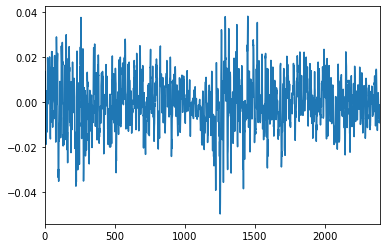

In [23]:
data['fwd_returns'].plot()

In [8]:
# Split the data into training and test sets. (0.75, 0.25) split.
train, test = train_test_split(data)

In [9]:
train.head()

,RSI,STOCHASTIC,fwd_returns
2316,49.418320,33.714208,0.004363
176,52.907955,69.013997,0.015439
2119,45.243821,41.344797,-0.000034
1623,52.256078,63.876029,0.007352
731,40.224862,-0.463557,-0.003301


In [14]:
train_x = train.drop(["fwd_returns"], axis=1)
test_x = test.drop(["fwd_returns"], axis=1)
train_y = train[["fwd_returns"]]
test_y = test[["fwd_returns"]]

In [19]:
alpha = .5
l1_ratio = .5

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
# lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
lr = RandomForestRegressor(max_depth=10,n_estimators=100)
lr.fit(train_x, train_y)
predicted_qualities = lr.predict(test_x)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
predicted_qualities

array([-2.11928410e-03,  1.77985428e-03,  1.52522902e-03, -9.84742466e-03,
        6.32933597e-03,  1.21729022e-02, -9.57915783e-03, -9.83798736e-03,
        5.13191129e-03, -1.95261564e-02,  3.36298472e-03, -1.90553916e-02,
        6.94480984e-03,  5.46823502e-04,  6.11516661e-03,  1.10215652e-02,
        1.38867206e-03, -1.48028550e-02, -2.02838496e-04,  3.54543808e-03,
        1.41971535e-03,  9.83080150e-03, -1.37139891e-02,  1.34335306e-04,
       -1.98394544e-03,  1.08446380e-02,  3.98229729e-03, -4.16423567e-03,
       -6.90922864e-04,  5.56699120e-03,  9.87024041e-04,  2.04175889e-03,
       -5.46401829e-03, -2.96733265e-03,  2.13210097e-03, -8.18877368e-03,
       -1.70702335e-02, -7.47177249e-03,  6.98602021e-03,  4.52522886e-03,
        2.09366750e-03, -1.12009045e-03,  9.64691312e-03,  1.38209368e-02,
        1.42146028e-03,  1.03921334e-03, -2.07295534e-04, -6.75940194e-03,
        2.54152643e-03,  2.58759142e-03,  4.57977537e-03, -1.07746979e-02,
        5.65319449e-04,  

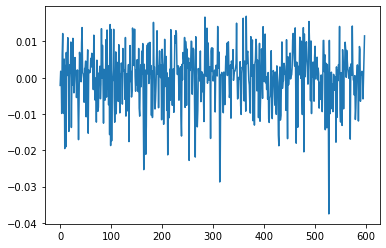

In [30]:
plt.plot(predicted_qualities)

In [31]:





(rmse, mae, r2) = eval_metrics(test_y, predicted_qualities)

print("Elasticnet model (alpha=%f, l1_ratio=%f):" % (alpha, l1_ratio))
print("  RMSE: %s" % rmse)
print("  MAE: %s" % mae)
print("  R2: %s" % r2)

mlflow.log_param("alpha", alpha)
mlflow.log_param("l1_ratio", l1_ratio)
mlflow.log_metric("rmse", rmse)
mlflow.log_metric("r2", r2)
mlflow.log_metric("mae", mae)
mlflow.sklearn.log_model(lr, "model")


Elasticnet model (alpha=0.500000, l1_ratio=0.500000):
  RMSE: 0.008586815743502287
  MAE: 0.006624640615669082
  R2: 0.3800373078211625


/opt/conda/lib/python3.7/site-packages/botocore/awsrequest.py:624: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  class HeadersDict(collections.MutableMapping):
